In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [33]:
FI_SGGE_matrix = pd.read_csv('FI_SGGE_across_iterations.csv', index_col=0, delimiter=';')
FI_SGGE_matrix = FI_SGGE_matrix.T
FI_SGGE_matrix.index = FI_SGGE_matrix.index.astype(float).astype(int)
FI_SGGE_matrix

FI,RF_SGGE_msi,XGB_SGGE_msi
1,PTMAP5,PTMAP5
2,MSH4,MSH4
3,BOLA3P3,MMP20
4,TAAR3,TMEM215
5,TNNC2,SLC13A2
...,...,...
16,LINC01168,GALNT14
17,ELOVL3,FAM90A24P
18,AC000374.1,AC019330.1
19,REN,TMEM252


In [34]:
# Rank microbes based on frequency of presence and label them with mean feature importance from each model

melted_df = FI_SGGE_matrix.reset_index().melt(id_vars='index', value_name='gene', var_name='model')

# Calculate the mean index (feature importance) for each microbe in each model
gene_mean_indices = melted_df.groupby(['gene', 'model'])['index'].mean().reset_index()

gene_counts = melted_df['gene'].value_counts()
filtered_gene = gene_counts[gene_counts >= 20*2].index

# Filter the mean indices dataframe to keep only the relevant microbes
filtered_gene_mean_indices = gene_mean_indices[gene_mean_indices['gene'].isin(filtered_gene)]

result_df = filtered_gene_mean_indices.pivot(index='gene', columns='model', values='index')
result_df = result_df.reindex(columns=FI_SGGE_matrix.columns)

# Sort the rows by the frequency of the microbes
sorted_gene = gene_counts.loc[filtered_gene].sort_values(ascending=False).index
result_df = result_df.loc[sorted_gene]

result_df = result_df.where(pd.notnull(result_df), None)

result_df


FI,RF_SGGE_msi,XGB_SGGE_msi
gene,,
PTMAP5,1.35,1.05
MSH4,1.65,2.30


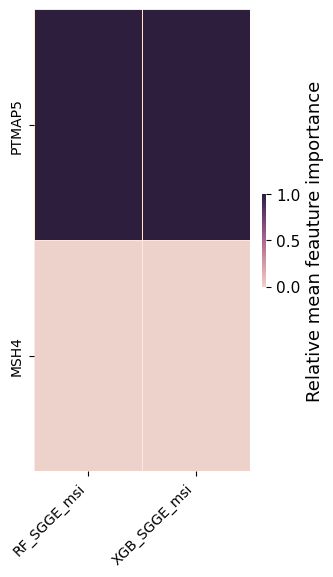

In [41]:
from sklearn.preprocessing import MinMaxScaler

# Convert all values to numeric and handle NaN
result_df = result_df.apply(pd.to_numeric, errors='coerce')

# Scaling
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(- result_df)
normalized_df = pd.DataFrame(scaled_df, index=result_df.index, columns=result_df.columns)

plt.figure(figsize=(3, 6))
cmap = sns.cubehelix_palette(as_cmap=True)

heatmap = sns.heatmap(normalized_df, annot=False, cmap=cmap, 
                      cbar_kws={'label': 'Relative mean feauture importance', 'fraction': 0.02, 'pad': 0.05},
                      linewidths=0.5, linecolor='mistyrose')

colorbar = heatmap.collections[0].colorbar
colorbar.set_label('Relative mean feauture importance', fontsize=13)  
colorbar.ax.tick_params(labelsize=11)

plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
# Labelled by mean feature importance

In [15]:
FI_matrix = pd.read_csv('FI_across_iterations.csv', index_col=0, delimiter=';')
FI_matrix = FI_matrix.T
FI_matrix.index = FI_matrix.index.astype(float).astype(int)
FI_matrix

FI,RF_SG_msi,XGB_SG_msi,RF_SG_stage,XGB_SG_stage,RF_SG_TL,XGB_SG_TL,RF_SG_BRAF,XGB_SG_BRAF,RF_SG_TP53,XGB_SG_TP53,RF_FMG_HC,XGB_FMG_HC,RF_FMG_stage,XGB_FMG_stage,RF_FMG_TL,XGB_FMG_TL,RF_SG_FMG_HC,XGB_SG_FMG_HC
1,g__Leptotrichia,g__Salmonella,g__Cloacibacillus,g__Paraprevotella,g__Staphylococcus,g__Catenibacterium,g__Selenomonas,g__Solibaculum,g__Selenomonas,g__Romboutsia,g__Lactobacillus,g__Tepidimicrobium,g__Peptostreptococcus,g__Trabulsiella,g__Erwinia,g__Pragia,g__Phocaeicola,g__Phocaeicola
2,g__Salmonella,g__Lachnoanaerobaculum,g__Thomasclavelia,g__Faecalibacterium,g__Catenibacterium,g__Actinobacillus,g__Odoribacter,g__Odoribacter,g__Leifsonia,g__Coprococcus,g__Zhizhongheella,g__Lactobacillus,g__Parvimonas,g__Sedimentibacter,g__Alloprevotella,g__Erwinia,g__Eubacterium,g__Eubacterium
3,g__Escherichia,g__Akkermansia,g__Candidatus Azobacteroides,g__Pantoea,g__Pseudoprevotella,g__Stella,g__Fusobacterium,g__Selenomonas,g__Anaeropeptidivorans,g__Butyrivibrio,g__Lachnospira,g__Mucinivorans,g__Sedimentibacter,g__Asaccharobacter,g__Erysipelothrix,g__Propionispora,g__Ruminococcus,g__Stomatobaculum
4,g__Enterobacter,g__Anaeropeptidivorans,g__Flavonifractor,g__Peptostreptococcus,g__Leptotrichia,g__Stomatobaculum,g__Butyricimonas,g__Faecalibaculum,g__Leptotrichia,g__Rhodoluna,g__Fusobacterium,g__Shuttleworthia,g__Dialister,g__Peptostreptococcus,g__Mannheimia,g__Mannheimia,g__Clostridium,g__Escherichia
5,g__Treponema,g__Klebsiella,g__Rhodopseudomonas,g__Anaerocolumna,g__Streptococcus,g__Wansuia,g__Vescimonas,g__Mogibacterium,g__Granulicella,g__Photobacterium,g__Atopobium,g__Xenorhabdus,g__Symbiobacterium,g__Bulleidia,g__Paraprevotella,g__Citrobacter,g__Acetivibrio,g__Intestinimonas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,g__Candidatus Azobacteroides,g__Bifidobacterium,g__Nocardioides,g__Cloacibacillus,g__Klebsiella,g__Novisyntrophococcus,g__Flavonifractor,g__Acetivibrio,g__Desulfovibrio,g__Clostridium,g__Anaerosporobacter,g__Acetivibrio,g__Veillonella,g__Shigella,g__Anaerosinus,g__Gemella,g__Peptostreptococcus,g__Shigella
17,g__Borreliella,g__Subdoligranulum,g__Caloramator,g__Aureimonas,g__Butyrivibrio,g__Claveliimonas,g__Pseudarthrobacter,g__Hymenobacter,g__Intestinimonas,g__Enterocloster,g__Vitreoscilla,g__Peptostreptococcus,g__Prolixibacter,g__Kosakonia,g__Faecalibacterium,g__Sedimentibacter,g__Pantoea,g__Selenomonas
18,g__Peptoniphilus,g__Desulfovibrio,g__Listeria,g__Lysobacter,g__Stella,g__Ruthenibacterium,g__Polaribacter,g__Sellimonas,g__Ruthenibacterium,g__Roseburia,g__Sphingobacterium,g__Thermotalea,g__Paraprevotella,g__Bulleidia,g__Desulfotomaculum,g__Avibacterium,g__Coriobacterium,g__Escherichia
19,g__Candidatus Karelsulcia,g__Histophilus,g__Phocaeicola,g__Amedibacterium,g__Odoribacter,g__Leptotrichia,g__Fluviicola,g__Escherichia,g__Rothia,g__Paraprevotella,g__Coprobacter,g__Escherichia,g__Propionispora,g__Collinsella,g__Paraprevotella,g__Anaerophaga,g__Lachnoanaerobaculum,g__Acetivibrio


In [16]:
# Rank microbes based on frequency of presence and label them with mean feature importance from each model

melted_df = FI_matrix.reset_index().melt(id_vars='index', value_name='microbe', var_name='model')

# Calculate the mean index (feature importance) for each microbe in each model
microbe_mean_indices = melted_df.groupby(['microbe', 'model'])['index'].mean().reset_index()

microbe_counts = melted_df['microbe'].value_counts()
filtered_microbes = microbe_counts[microbe_counts >= 20*2].index

# Filter the mean indices dataframe to keep only the relevant microbes
filtered_microbe_mean_indices = microbe_mean_indices[microbe_mean_indices['microbe'].isin(filtered_microbes)]

result_df = filtered_microbe_mean_indices.pivot(index='microbe', columns='model', values='index')
result_df = result_df.reindex(columns=FI_matrix.columns)

# Sort the rows by the frequency of the microbes
sorted_microbes = microbe_counts.loc[filtered_microbes].sort_values(ascending=False).index
result_df = result_df.loc[sorted_microbes]

result_df = result_df.where(pd.notnull(result_df), None)

result_df


FI,RF_SG_msi,XGB_SG_msi,RF_SG_stage,XGB_SG_stage,RF_SG_TL,XGB_SG_TL,RF_SG_BRAF,XGB_SG_BRAF,RF_SG_TP53,XGB_SG_TP53,RF_FMG_HC,XGB_FMG_HC,RF_FMG_stage,XGB_FMG_stage,RF_FMG_TL,XGB_FMG_TL,RF_SG_FMG_HC,XGB_SG_FMG_HC
microbe,,,,,,,,,,,,,,,,,,
g__Selenomonas,8.200000,11.800000,NaN,12.000000,5.550000,14.923077,6.315789,10.916667,3.500000,10.944444,NaN,NaN,NaN,12.666667,NaN,NaN,NaN,16.666667
g__Lactobacillus,NaN,7.000000,13.500000,15.750000,12.571429,13.000000,NaN,12.166667,11.714286,NaN,2.200000,7.000000,NaN,NaN,14.285714,16.000000,7.950000,10.166667
g__Leptotrichia,1.100000,2.050000,8.666667,9.666667,5.900000,15.333333,17.750000,11.125000,4.900000,11.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
g__Peptostreptococcus,NaN,NaN,NaN,8.333333,NaN,16.000000,NaN,NaN,17.000000,NaN,3.400000,13.000000,2.050000,7.937500,NaN,NaN,18.000000,13.100000
g__Fusobacterium,11.000000,NaN,NaN,NaN,20.000000,20.000000,7.842105,13.875000,13.230769,19.000000,5.684211,10.100000,NaN,NaN,NaN,2.000000,15.928571,12.500000
g__Roseburia,NaN,16.333333,NaN,11.000000,10.923077,12.357143,NaN,NaN,9.444444,11.111111,16.000000,16.666667,NaN,NaN,15.000000,NaN,8.950000,11.800000
g__Ruminococcus,13.600000,6.500000,9.250000,5.500000,15.000000,NaN,15.500000,NaN,11.076923,8.857143,16.000000,5.000000,18.000000,14.800000,NaN,19.500000,3.400000,7.100000
g__Parvimonas,NaN,NaN,NaN,1.000000,NaN,11.000000,20.000000,13.500000,NaN,NaN,5.157895,8.000000,1.100000,6.050000,NaN,11.000000,15.800000,NaN
g__Porphyromonas,NaN,NaN,NaN,17.333333,5.950000,12.500000,NaN,NaN,11.454545,13.800000,NaN,13.500000,13.947368,15.000000,NaN,NaN,17.076923,13.600000


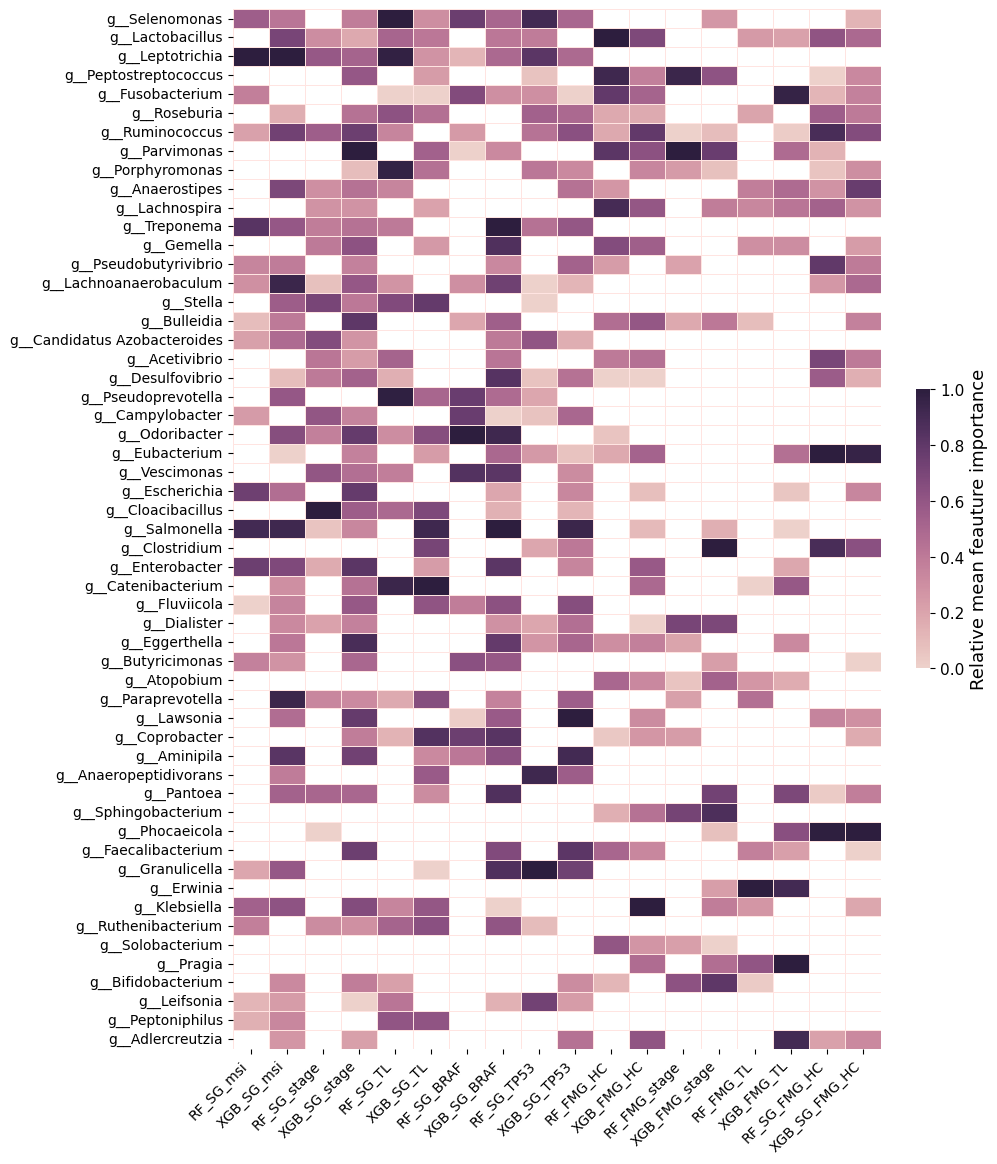

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Convert all values to numeric and handle NaN
result_df = result_df.apply(pd.to_numeric, errors='coerce')

# Scaling
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(- result_df)
normalized_df = pd.DataFrame(scaled_df, index=result_df.index, columns=result_df.columns)

plt.figure(figsize=(9, 13.5))
cmap = sns.cubehelix_palette(as_cmap=True)

heatmap = sns.heatmap(normalized_df, annot=False, cmap=cmap, 
                      cbar_kws={'label': 'Relative mean feauture importance', 'fraction': 0.02, 'pad': 0.05},
                      linewidths=0.5, linecolor='mistyrose')

colorbar = heatmap.collections[0].colorbar
colorbar.set_label('Relative mean feauture importance', fontsize=13)  
colorbar.ax.tick_params(labelsize=11)

plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [18]:
print(result_df.T.columns)

Index(['g__Selenomonas', 'g__Lactobacillus', 'g__Leptotrichia',
       'g__Peptostreptococcus', 'g__Fusobacterium', 'g__Roseburia',
       'g__Ruminococcus', 'g__Parvimonas', 'g__Porphyromonas',
       'g__Anaerostipes', 'g__Lachnospira', 'g__Treponema', 'g__Gemella',
       'g__Pseudobutyrivibrio', 'g__Lachnoanaerobaculum', 'g__Stella',
       'g__Bulleidia', 'g__Candidatus Azobacteroides', 'g__Acetivibrio',
       'g__Desulfovibrio', 'g__Pseudoprevotella', 'g__Campylobacter',
       'g__Odoribacter', 'g__Eubacterium', 'g__Vescimonas', 'g__Escherichia',
       'g__Cloacibacillus', 'g__Salmonella', 'g__Clostridium',
       'g__Enterobacter', 'g__Catenibacterium', 'g__Fluviicola',
       'g__Dialister', 'g__Eggerthella', 'g__Butyricimonas', 'g__Atopobium',
       'g__Paraprevotella', 'g__Lawsonia', 'g__Coprobacter', 'g__Aminipila',
       'g__Anaeropeptidivorans', 'g__Pantoea', 'g__Sphingobacterium',
       'g__Phocaeicola', 'g__Faecalibacterium', 'g__Granulicella',
       'g__Erwinia',

In [19]:
normalized_df.columns

Index(['RF_SG_msi', 'XGB_SG_msi', 'RF_SG_stage', 'XGB_SG_stage', 'RF_SG_TL',
       'XGB_SG_TL', 'RF_SG_BRAF', 'XGB_SG_BRAF', 'RF_SG_TP53', 'XGB_SG_TP53',
       'RF_FMG_HC', 'XGB_FMG_HC', 'RF_FMG_stage', 'XGB_FMG_stage', 'RF_FMG_TL',
       'XGB_FMG_TL', 'RF_SG_FMG_HC', 'XGB_SG_FMG_HC'],
      dtype='object', name='FI')

Extract clinical characteristic-specific genera:

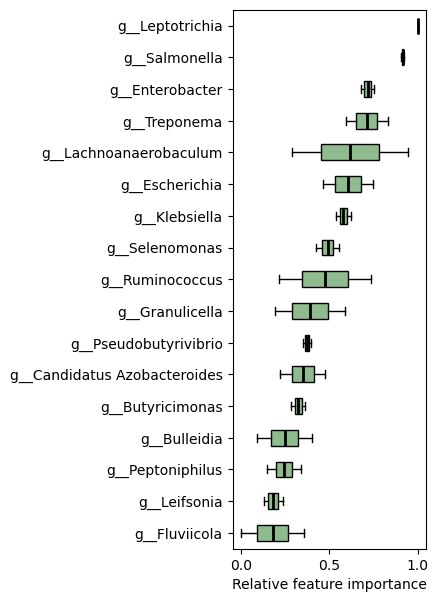

In [20]:
SG_msi_df = normalized_df.drop(['RF_SG_stage', 'XGB_SG_stage', 'RF_SG_TL',
       'XGB_SG_TL', 'RF_SG_BRAF', 'XGB_SG_BRAF', 'RF_SG_TP53', 'XGB_SG_TP53', 'RF_FMG_HC', 'XGB_FMG_HC', 'RF_FMG_stage',
       'XGB_FMG_stage', 'RF_FMG_TL', 'XGB_FMG_TL',
       'RF_SG_FMG_HC', 'XGB_SG_FMG_HC',], axis = 1)
SG_msi_df = SG_msi_df.dropna()
SG_msi_df['SG_msi'] = SG_msi_df.median(axis=1)

SG_msi_df = SG_msi_df.sort_values(by='SG_msi', ascending=False)
SG_msi_df = SG_msi_df.T

plt.figure(figsize=(2.5, 7))
plt.boxplot(SG_msi_df, vert=False, patch_artist=True,
            labels=SG_msi_df.columns, 
            boxprops={'facecolor': 'darkseagreen', 'color': 'black'},
            medianprops={'color': 'black', 'linewidth': 2}) 

plt.xlabel('Relative feature importance')
plt.ylabel('')
plt.gca().invert_yaxis()
plt.show()

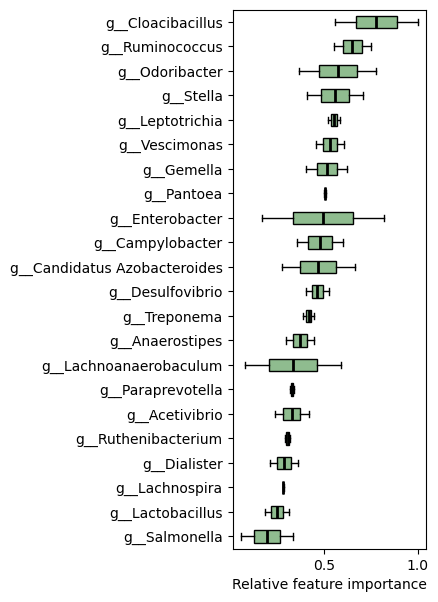

In [21]:
SG_stage_df = normalized_df.drop(['RF_SG_msi', 'XGB_SG_msi', 'RF_SG_TL',
       'XGB_SG_TL', 'RF_SG_BRAF', 'XGB_SG_BRAF', 'RF_SG_TP53', 'XGB_SG_TP53',
        'RF_FMG_HC', 'XGB_FMG_HC', 'RF_FMG_stage',
       'XGB_FMG_stage', 'RF_FMG_TL', 'XGB_FMG_TL','RF_SG_FMG_HC', 'XGB_SG_FMG_HC'], axis = 1)
SG_stage_df = SG_stage_df.dropna()
SG_stage_df['SG_stage'] = SG_stage_df.median(axis=1)

SG_stage_df = SG_stage_df.sort_values(by='SG_stage', ascending=False)
SG_stage_df = SG_stage_df.T

plt.figure(figsize=(2.5, 7))
plt.boxplot(SG_stage_df, vert=False, patch_artist=True,
            labels=SG_stage_df.columns,
            boxprops={'facecolor': 'darkseagreen', 'color': 'black'},
            medianprops={'color': 'black', 'linewidth': 2})

plt.xlabel('Relative feature importance')
plt.ylabel('')
plt.gca().invert_yaxis()
plt.show()

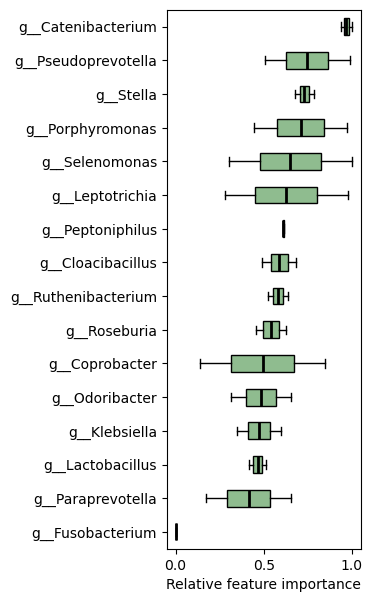

In [22]:
SG_TL_df = normalized_df.drop(['RF_SG_msi', 'XGB_SG_msi', 'RF_SG_stage', 'XGB_SG_stage', 'RF_SG_BRAF', 'XGB_SG_BRAF', 'RF_SG_TP53', 'XGB_SG_TP53',
       'RF_FMG_HC', 'XGB_FMG_HC', 'RF_FMG_stage',
       'XGB_FMG_stage', 'RF_FMG_TL', 'XGB_FMG_TL', 'RF_SG_FMG_HC', 'XGB_SG_FMG_HC'], axis = 1)
SG_TL_df = SG_TL_df.dropna()
SG_TL_df['SG_TL'] = SG_TL_df.median(axis=1)

SG_TL_df = SG_TL_df.sort_values(by='SG_TL', ascending=False)
SG_TL_df = SG_TL_df.T

plt.figure(figsize=(2.5, 7))
plt.boxplot(SG_TL_df, vert=False, patch_artist=True,
            labels=SG_TL_df.columns,
            boxprops={'facecolor': 'darkseagreen', 'color': 'black'},
            medianprops={'color': 'black', 'linewidth': 2}) 

plt.xlabel('Relative feature importance')
plt.ylabel('')
plt.gca().invert_yaxis()
plt.show()

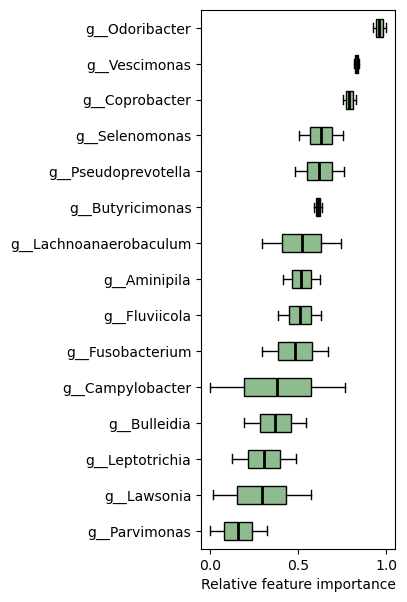

In [23]:
SG_BRAF_df = normalized_df.drop(['RF_SG_msi', 'XGB_SG_msi', 'RF_SG_stage', 'XGB_SG_stage', 'RF_SG_TL', 'XGB_SG_TL',
                                'RF_SG_TP53', 'XGB_SG_TP53',
        'RF_FMG_HC', 'XGB_FMG_HC', 'RF_FMG_stage',
       'XGB_FMG_stage', 'RF_FMG_TL', 'XGB_FMG_TL', 'RF_SG_FMG_HC', 'XGB_SG_FMG_HC'], axis = 1)
SG_BRAF_df = SG_BRAF_df.dropna()
SG_BRAF_df['SG_BRAF'] = SG_BRAF_df.median(axis=1)

SG_BRAF_df = SG_BRAF_df.sort_values(by='SG_BRAF', ascending=False)
SG_BRAF_df = SG_BRAF_df.T

plt.figure(figsize=(2.5, 7))
plt.boxplot(SG_BRAF_df, vert=False, patch_artist=True,
            labels=SG_BRAF_df.columns,
            boxprops={'facecolor': 'darkseagreen', 'color': 'black'},
            medianprops={'color': 'black', 'linewidth': 2})

plt.xlabel('Relative feature importance')
plt.ylabel('')
plt.gca().invert_yaxis()
plt.show()

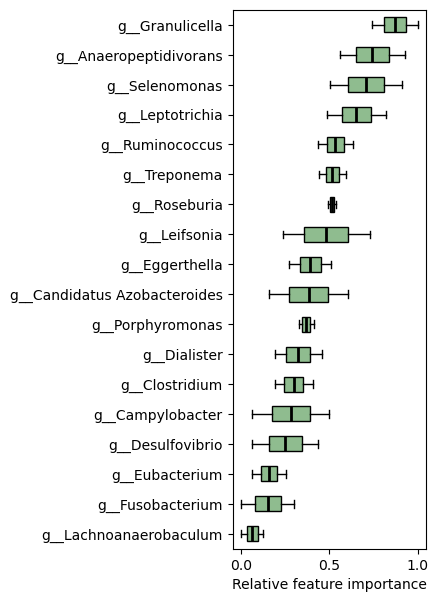

In [24]:
SG_TP53_df = normalized_df.drop(['RF_SG_msi', 'XGB_SG_msi', 'RF_SG_stage', 'XGB_SG_stage', 'RF_SG_TL', 'XGB_SG_TL',
                                  'RF_SG_BRAF', 'XGB_SG_BRAF',
       'RF_FMG_HC', 'XGB_FMG_HC', 'RF_FMG_stage',
       'XGB_FMG_stage', 'RF_FMG_TL', 'XGB_FMG_TL', 'RF_SG_FMG_HC', 'XGB_SG_FMG_HC'], axis = 1)
SG_TP53_df = SG_TP53_df.dropna()
SG_TP53_df['SG_TP53'] = SG_TP53_df.median(axis=1)

SG_TP53_df = SG_TP53_df.sort_values(by='SG_TP53', ascending=False)
SG_TP53_df = SG_TP53_df.T

plt.figure(figsize=(2.5, 7))
plt.boxplot(SG_TP53_df, vert=False, patch_artist=True,
            labels=SG_TP53_df.columns,
            boxprops={'facecolor': 'darkseagreen', 'color': 'black'},
            medianprops={'color': 'black', 'linewidth': 2}) 

plt.xlabel('Relative feature importance')
plt.ylabel('')
plt.gca().invert_yaxis()
plt.show()

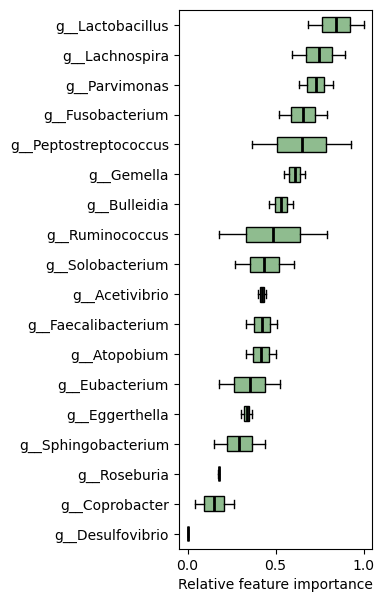

In [25]:
FMG_HC_df = normalized_df.drop(['RF_SG_msi', 'XGB_SG_msi', 'RF_SG_stage', 'XGB_SG_stage', 'RF_SG_TL',
       'XGB_SG_TL', 'RF_SG_BRAF', 'XGB_SG_BRAF', 'RF_SG_TP53', 'XGB_SG_TP53',
       'RF_FMG_stage',
       'XGB_FMG_stage', 'RF_FMG_TL', 'XGB_FMG_TL', 'RF_SG_FMG_HC', 'XGB_SG_FMG_HC'], axis = 1)
FMG_HC_df = FMG_HC_df.dropna()
FMG_HC_df['FMG_HC'] = FMG_HC_df.median(axis=1)

FMG_HC_df = FMG_HC_df.sort_values(by='FMG_HC', ascending=False)
FMG_HC_df = FMG_HC_df.T

plt.figure(figsize=(2.5, 7))
plt.boxplot(FMG_HC_df, vert=False, patch_artist=True,
            labels=FMG_HC_df.columns,
            boxprops={'facecolor': 'darkseagreen', 'color': 'black'},
            medianprops={'color': 'black', 'linewidth': 2}) 

plt.xlabel('Relative feature importance')
plt.ylabel('')
plt.gca().invert_yaxis()
plt.show()

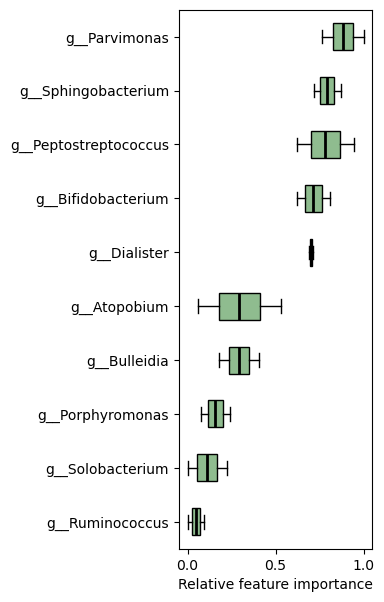

In [26]:
FMG_stage_df = normalized_df.drop(['RF_SG_msi', 'XGB_SG_msi', 'RF_SG_stage', 'XGB_SG_stage', 'RF_SG_TL',
       'XGB_SG_TL', 'RF_SG_BRAF', 'XGB_SG_BRAF', 'RF_SG_TP53', 'XGB_SG_TP53',
        'RF_FMG_HC', 'XGB_FMG_HC', 'RF_FMG_TL', 'XGB_FMG_TL', 'RF_SG_FMG_HC', 'XGB_SG_FMG_HC'], axis = 1)
FMG_stage_df = FMG_stage_df.dropna()
FMG_stage_df['FMG_stage'] = FMG_stage_df.median(axis=1)

FMG_stage_df = FMG_stage_df.sort_values(by='FMG_stage', ascending=False)
FMG_stage_df = FMG_stage_df.T

plt.figure(figsize=(2.5, 7))
plt.boxplot(FMG_stage_df, vert=False, patch_artist=True,
            labels=FMG_stage_df.columns,
            boxprops={'facecolor': 'darkseagreen', 'color': 'black'},
            medianprops={'color': 'black', 'linewidth': 2}) 

plt.xlabel('Relative feature importance')
plt.ylabel('')
plt.gca().invert_yaxis()
plt.show()

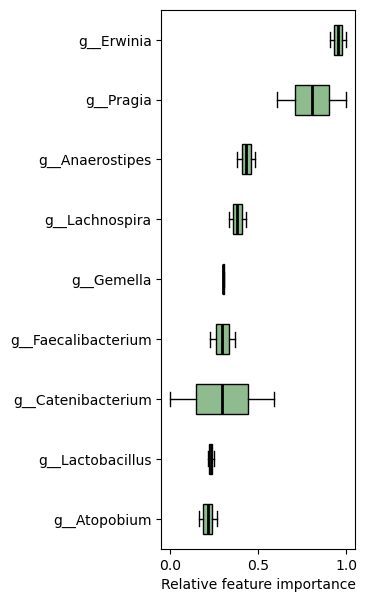

In [27]:
FMG_TL_df = normalized_df.drop(['RF_SG_msi', 'XGB_SG_msi', 'RF_SG_stage', 'XGB_SG_stage', 'RF_SG_TL',
       'XGB_SG_TL', 'RF_SG_BRAF', 'XGB_SG_BRAF', 'RF_SG_TP53', 'XGB_SG_TP53',
       'RF_FMG_HC', 'XGB_FMG_HC', 'RF_FMG_stage', 'XGB_FMG_stage', 'RF_SG_FMG_HC', 'XGB_SG_FMG_HC'], axis = 1)
FMG_TL_df = FMG_TL_df.dropna()
FMG_TL_df['FMG_TL'] = FMG_TL_df.median(axis=1)

FMG_TL_df = FMG_TL_df.sort_values(by='FMG_TL', ascending=False)
FMG_TL_df = FMG_TL_df.T

plt.figure(figsize=(2.5, 7))
plt.boxplot(FMG_TL_df, vert=False, patch_artist=True,
            labels=FMG_TL_df.columns,
            boxprops={'facecolor': 'darkseagreen', 'color': 'black'},
            medianprops={'color': 'black', 'linewidth': 2}) 

plt.xlabel('Relative feature importance')
plt.ylabel('')
plt.gca().invert_yaxis()
plt.show()

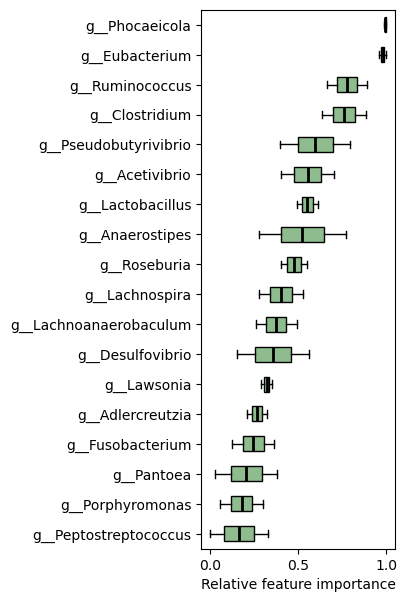

In [29]:
SG_FMG_HC = normalized_df.drop(['RF_SG_msi', 'XGB_SG_msi', 'RF_SG_stage', 'XGB_SG_stage', 'RF_SG_TL',
       'XGB_SG_TL', 'RF_SG_BRAF', 'XGB_SG_BRAF', 'RF_SG_TP53', 'XGB_SG_TP53',
        'RF_FMG_HC', 'XGB_FMG_HC', 'RF_FMG_stage',
       'XGB_FMG_stage', 'RF_FMG_TL', 'XGB_FMG_TL'], axis = 1)
SG_FMG_HC = SG_FMG_HC.dropna()
SG_FMG_HC['SG_FMG_HC'] = SG_FMG_HC.median(axis=1)

SG_FMG_HC = SG_FMG_HC.sort_values(by='SG_FMG_HC', ascending=False)
SG_FMG_HC = SG_FMG_HC.T

plt.figure(figsize=(2.5, 7))
plt.boxplot(SG_FMG_HC, vert=False, patch_artist=True,
            labels=SG_FMG_HC.columns,
            boxprops={'facecolor': 'darkseagreen', 'color': 'black'},
            medianprops={'color': 'black', 'linewidth': 2}) 

plt.xlabel('Relative feature importance')
plt.ylabel('')
plt.gca().invert_yaxis()
plt.show()